In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import joblib

In [ ]:
!pip install -q dagshub mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Define the file path (Update the path )
file_path = "final_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Class,URI,POST-Data,GET-Query,URI_Length,GET_Length,POST_Length,URI_Entropy,GET_Entropy,POST_Entropy,Numeric_Text_Ratio,Special_Char_Count
0,Valid,/tienda1/index.jsp,NaN,NaN,18,0,0,3.614369,0.000000,0.000000,0.250000,2
1,Valid,/tienda1/publico/anadir.jsp,NaN,id=1&nombre=Jam%F3n+Ib%E9rico&precio=39&cantid...,27,74,0,4.004344,4.501296,0.000000,0.729412,8
2,Valid,/tienda1/publico/anadir.jsp,id=1&nombre=Jam%F3n+Ib%E9rico&precio=39&cantid...,NaN,27,0,74,4.004344,0.000000,4.501296,0.729412,8
3,Valid,/tienda1/publico/autenticar.jsp,NaN,modo=entrar&login=caria&pwd=egipciaca&remember...,31,60,0,4.018082,4.129471,0.000000,0.290909,8
4,Valid,/tienda1/publico/autenticar.jsp,modo=entrar&login=caria&pwd=egipciaca&remember...,NaN,31,0,60,4.018082,0.000000,4.129471,0.290909,8


In [ ]:
X = df.drop(columns=["Class","POST-Data","GET-Query","URI","URI_Length", "URI_Entropy"])  # Features
# Convert target variable to numeric format
y = df["Class"].map({"Valid": 0, "Anomalous": 1})  # Valid → 0, Anomalous → 1


In [ ]:
# Splitting dataset into 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset shapes
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (42745, 6), Validation: (9160, 6), Test: (9160, 6)


In [ ]:
import dagshub
dagshub.init(repo_owner='username', repo_name='reponame', mlflow=True)
# Set MLflow experiment
mlflow.set_experiment("Hybrid-WAF-Models")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=5e3f73f9-1cb0-49ea-989c-7234f04de175&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=1bde63f17b0edaf49c9917020159f556024837646d358aaf8e6f037cd0eff1df




Accessing as riyazmullaji

Initialized MLflow to track repo "riyazmullaji/HYBRID-WAF"

Repository riyazmullaji/HYBRID-WAF initialized!

<Experiment: artifact_location='mlflow-artifacts:/992deeaa674d4c8c823c8a5fe40f2f22', creation_time=1742466453869, experiment_id='2', last_update_time=1742466453869, lifecycle_stage='active', name='Hybrid-WAF-Models', tags={}>

In [ ]:
from sklearn.preprocessing import RobustScaler
import joblib

# Robust Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Save the fitted scaler in Google Drive
scaler_filename = "/robust.pkl"
joblib.dump(scaler, scaler_filename)

print(f"Scaler saved at: {scaler_filename}")

Scaler saved at: /content/drive/My Drive/Hybrid-WAF/robust.pkl


In [ ]:
# Define models and their datasets
models = {
    # Tree-based Models (Unscaled Data)
    "RandomForest": (RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_val),
    "XGBoost": (XGBClassifier(verbosity=1), X_train, X_val),
    "LightGBM": (LGBMClassifier(), X_train, X_val),

    # Distance-based Models (Scaled Data)
    "LogisticRegression": (LogisticRegression(), X_train_scaled, X_val_scaled),
    "SVM": (SVC(), X_train_scaled, X_val_scaled),
    "KNN": (KNeighborsClassifier(n_neighbors=5), X_train_scaled, X_val_scaled)
}


# Train models & log results with MLflow
for model_name, (model, X_train_data, X_val_data) in models.items():
    input_example = X.iloc[:1].to_dict(orient="records")[0]

    with mlflow.start_run(run_name=model_name):
        # Train model
        model.fit(X_train_data, y_train)

        # Predictions
        y_pred = model.predict(X_val_data)
        y_proba = model.predict_proba(X_val_data)[:, 1] if hasattr(model, "predict_proba") else None  # Some models don't support predict_proba

        # Compute Metrics
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, average="weighted")
        precision = precision_score(y_val, y_pred, average="weighted")
        recall = recall_score(y_val, y_pred, average="weighted")
        roc_auc = roc_auc_score(y_val, y_proba) if y_proba is not None else None

        # Log Metrics in MLflow
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)

        if roc_auc is not None:
            mlflow.log_metric("roc_auc", roc_auc)

        # Log Model in MLflow
        mlflow.sklearn.log_model(model, model_name, input_example=input_example)

        print(f"{model_name} - Accuracy: {acc:.4f}, F1-score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC-AUC: {roc_auc if roc_auc is not None else 'N/A'}")



/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

RandomForest - Accuracy: 0.9039, F1-score: 0.9037, Precision: 0.9038, Recall: 0.9039, ROC-AUC: 0.9744693410165485
🏃 View run RandomForest at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2/runs/d039dd4c46e24b29b3a48f749db48ee8
🧪 View experiment at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2


/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

XGBoost - Accuracy: 0.9039, F1-score: 0.9035, Precision: 0.9039, Recall: 0.9039, ROC-AUC: 0.9742217297084318
🏃 View run XGBoost at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2/runs/b3c8e7b47f734611befc780e2e05eb99
🧪 View experiment at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2
[LightGBM] [Info] Number of positive: 17545, number of negative: 25200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 42745, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410457 -> initscore=-0.362075
[LightGBM] [Info] Start training from score -0.362075


/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

LightGBM - Accuracy: 0.9062, F1-score: 0.9058, Precision: 0.9062, Recall: 0.9062, ROC-AUC: 0.9750935037431048
🏃 View run LightGBM at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2/runs/66e33976d0d0442492770a5f2b870a32
🧪 View experiment at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2


/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

LogisticRegression - Accuracy: 0.7319, F1-score: 0.7301, Precision: 0.7297, Recall: 0.7319, ROC-AUC: 0.7667267533490937
🏃 View run LogisticRegression at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2/runs/db86d20ae9b1485f9c7065c3ba2d21f3
🧪 View experiment at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2


/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

SVM - Accuracy: 0.7358, F1-score: 0.7274, Precision: 0.7362, Recall: 0.7358, ROC-AUC: N/A
🏃 View run SVM at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2/runs/fe8e050904464b699ddb9cfc2f48fbea
🧪 View experiment at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2


/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

KNN - Accuracy: 0.8974, F1-score: 0.8972, Precision: 0.8972, Recall: 0.8974, ROC-AUC: 0.9595715130023641
🏃 View run KNN at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2/runs/7f6b624eac414625a3b4365b7606c9fa
🧪 View experiment at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2


In [ ]:
# Dictionary to store results
results = []

# Evaluate models
for model_name, (model, X_train_data, X_val_data) in models.items():
    # Train model (Only if the model hasn't been trained before)
    if not hasattr(model, "classes_"):  # Check if the model has been fitted before
        model.fit(X_train_data, y_train)

    # Predictions
    y_pred = model.predict(X_val_data)
    y_proba = model.predict_proba(X_val_data)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute metrics
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average="weighted")
    precision = precision_score(y_val, y_pred, average="weighted")
    recall = recall_score(y_val, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_val, y_proba) if y_proba is not None else None

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "ROC AUC": roc_auc if roc_auc is not None else "N/A"
    })

# Convert to DataFrame and display
df_results = pd.DataFrame(results)
print(df_results)

[LightGBM] [Info] Number of positive: 17545, number of negative: 25200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 42745, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410457 -> initscore=-0.362075
[LightGBM] [Info] Start training from score -0.362075
                Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0        RandomForest  0.903930  0.903670   0.903753  0.903930  0.974469
1             XGBoost  0.903930  0.903525   0.903896  0.903930  0.974222
2            LightGBM  0.906223  0.905811   0.906237  0.906223  0.975094
3  LogisticRegression  0.731878  0.730125   0.729712  0.731878  0.766727
4                 SVM  0.735808  0.727362   0.736227  0.735808       N/A
5    

In [ ]:
from lightgbm import LGBMClassifier
import mlflow
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Merge training and validation sets
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)

# Instantiate and train LGBM on the full training set
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_full, y_train_full)

# Evaluate on test set
y_test_pred = lgbm_model.predict(X_test)
y_test_proba = lgbm_model.predict_proba(X_test)[:, 1]  # Probability scores

# Compute performance metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average="weighted")
test_precision = precision_score(y_test, y_test_pred, average="weighted")
test_recall = recall_score(y_test, y_test_pred, average="weighted")
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print results
print(f"LGBM Test Performance:")
print(f"Accuracy: {test_acc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

# Log results in MLflow
with mlflow.start_run(run_name="LGBM Final"):
    mlflow.log_metric("test_accuracy", test_acc)
    mlflow.log_metric("test_f1_score", test_f1)
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)
    mlflow.log_metric("test_roc_auc", test_roc_auc)

    mlflow.sklearn.log_model(lgbm_model, "lgbm_model_final")


[LightGBM] [Info] Number of positive: 21305, number of negative: 30600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 51905, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410461 -> initscore=-0.362058
[LightGBM] [Info] Start training from score -0.362058
LGBM Test Performance:
Accuracy: 0.9039
F1 Score: 0.9034
Precision: 0.9042
Recall: 0.9039
ROC-AUC: 0.9731


2025/04/12 06:36:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBM Final at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2/runs/e584e8449d6844f4ae539012603a8d5a
🧪 View experiment at: https://dagshub.com/riyazmullaji/HYBRID-WAF.mlflow/#/experiments/2


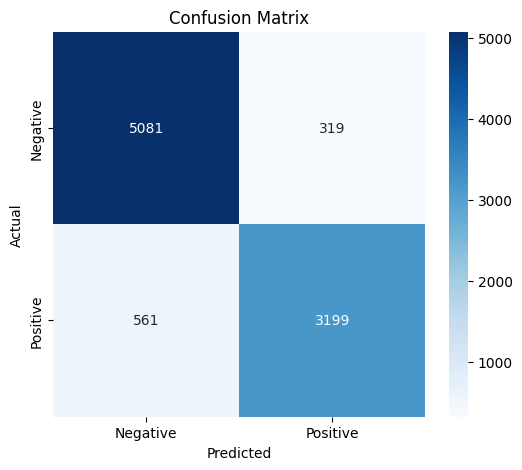

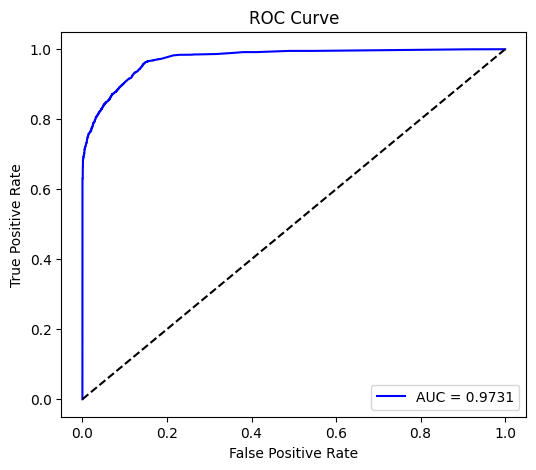

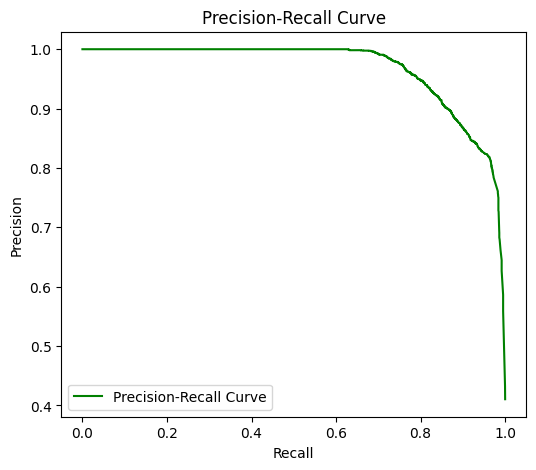

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#  ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {test_roc_auc:.4f}")
plt.plot([0, 1], [0, 1], "k--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#  Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="green", label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [ ]:
save_path = "Define your path"


In [ ]:
import lightgbm as lgb
import joblib

# Save model
model_filename = save_path + "new_LGBM_model.pkl"
joblib.dump(lgbm_model, model_filename)

print(f"Model saved at: {model_filename}")

Model saved at: /content/drive/My Drive/Hybrid-WAF/new_LGBM_model.pkl
